# Boston House Price Prediction

### Task 3
#### SYNC Machine Learning Internship
##### Tridib Dalui

In [1]:
# libraries

import numpy as np
import pandas as pd

In [2]:
# read data

from sklearn.datasets import load_boston
bos=load_boston()
bos

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# transform the dataset into dataframe
# data=independent variable (x)
# feature_names=columns
# target=dependent variable (y)

x=pd.DataFrame(bos.data,columns=bos.feature_names)
y=pd.DataFrame(bos.target)

In [4]:
x.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
44,0.12269,0.0,6.91,0.0,0.448,6.069,40.0,5.7209,3.0,233.0,17.9,389.39,9.55
234,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31


In [5]:
y.sample(3)

,0
34,13.5
434,11.7
273,35.2


### Data Preprocessing

In [6]:
print(x.shape)
print(y.shape)

(506, 13)
(506, 1)


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
x.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
### Visulaization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

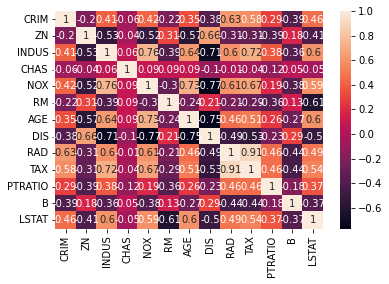

In [12]:
cr=x.corr().round(2)
sns.heatmap(data=cr, annot=True)

so we will take 'LSTAT','RM','PTRATIO','INDUS' columns as they have highest correlation

In [13]:
x=x[['LSTAT','RM','PTRATIO','INDUS']]

In [14]:
x

,LSTAT,RM,PTRATIO,INDUS
0,4.98,6.575,15.3,2.31
1,9.14,6.421,17.8,7.07
2,4.03,7.185,17.8,7.07
3,2.94,6.998,18.7,2.18
4,5.33,7.147,18.7,2.18
...,...,...,...,...
501,9.67,6.593,21.0,11.93
502,9.08,6.120,21.0,11.93
503,5.64,6.976,21.0,11.93
504,6.48,6.794,21.0,11.93


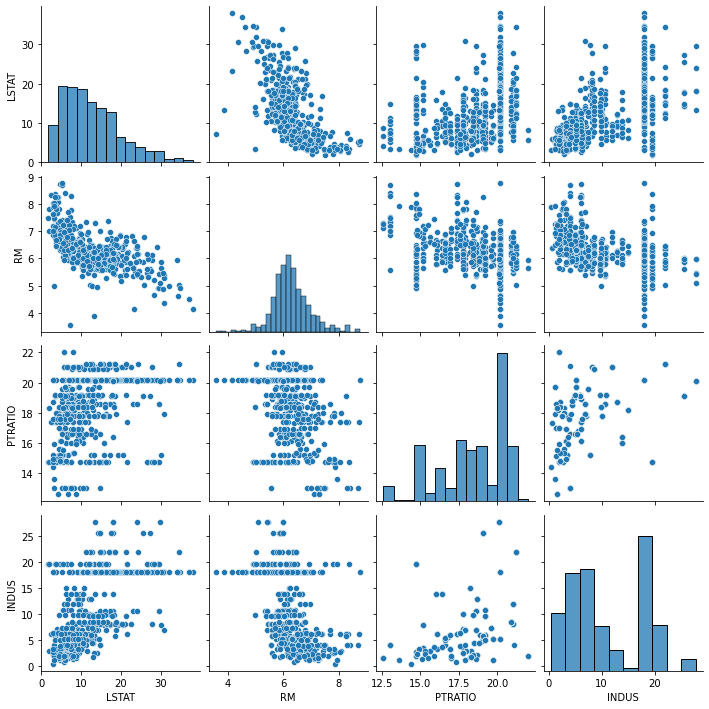

In [15]:
sns.pairplot(x)

### splitting the dataset into training and testing data

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 4)
(404, 1)
(102, 4)
(102, 1)


### Model selection

In [18]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')

In [20]:
scaler=StandardScaler()

In [21]:
# LinearRegression

lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred_lr=pipe.predict(x_test)
r2=r2_score(y_test,y_pred_lr)
r2

0.6185192721157523

In [22]:
#random forest regressor

rfr=RandomForestRegressor()
pipe=make_pipeline(column_trans,rfr)
pipe.fit(x_train,y_train)
y_pred_rfr=pipe.predict(x_test)
r1=r2_score(y_test,y_pred_rfr)
r1

C:\Users\tridi\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8308463574893608

In [23]:
#XGB regressor

xgbr=XGBRegressor()
pipe=make_pipeline(column_trans,xgbr)
pipe.fit(x_train,y_train)
y_pred_xgbr=pipe.predict(x_test)
r2=r2_score(y_test,y_pred_xgbr)
r2

0.8304365602587976

let's run XGBRegression for 50 times and store the highest scores

In [24]:
score=[]
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    xgbr=XGBRegressor()
    pipe=make_pipeline(column_trans,xgbr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [25]:
score[np.argmax(score)]

0.8771784409395387

In [26]:
#saving according to the best item

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(score))
xgbr=XGBRegressor()
pipe=make_pipeline(column_trans,xgbr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8771784409395387

### testing our model

In [27]:
pipe.predict(pd.DataFrame([[4.03,7.185,17.8,7.07]],
            columns=['LSTAT','RM','PTRATIO','INDUS']))

array([34.714195], dtype=float32)

### Save the model

In [28]:
import pickle
pickle.dump(pipe,open('house.pkl','wb'))

# Thank You